In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Input
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

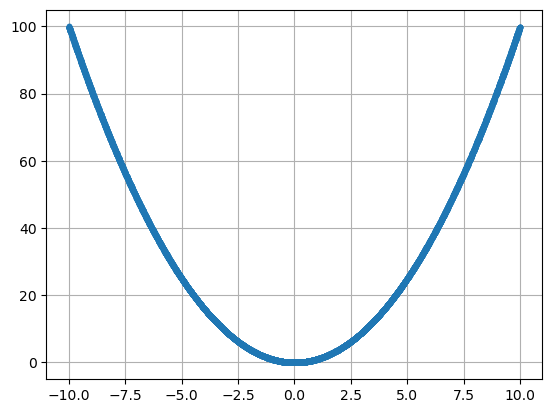

In [3]:
x = np.random.uniform(-10, 10, 10000)
y = x**2 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
plt.plot(x, y, ".")
plt.grid()

In [4]:
inputs = Input(shape=(1,))
x_dense = Dense(64, activation='relu')(inputs)  # first hidden layer
x_dense = Dense(64, activation='relu')(x_dense)  # second hidden layer
outputs = Dense(1)(x_dense)  # output layer for regression


model = Model(inputs= inputs, outputs= outputs) 

model.compile(optimizer= 'adam', loss = 'mse')
model.fit(x_train, y_train, epochs= 100, batch_size=32, validation_split=0.1)

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1127.4073 - val_loss: 137.7175
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 127.1614 - val_loss: 92.9849
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 80.7314 - val_loss: 53.4085
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 44.5405 - val_loss: 26.4636
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 22.7452 - val_loss: 12.5661
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 11.2921 - val_loss: 6.0472
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 5.1961 - val_loss: 2.9953
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 2.6263 - val_loss: 1.6470
Epoch 9/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 1.5148 - val_loss: 0.9196
Epoch 10/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.8457 - val_loss: 0.6070
Epoch 11/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6109 - val_loss: 0.3761
Epoch 12

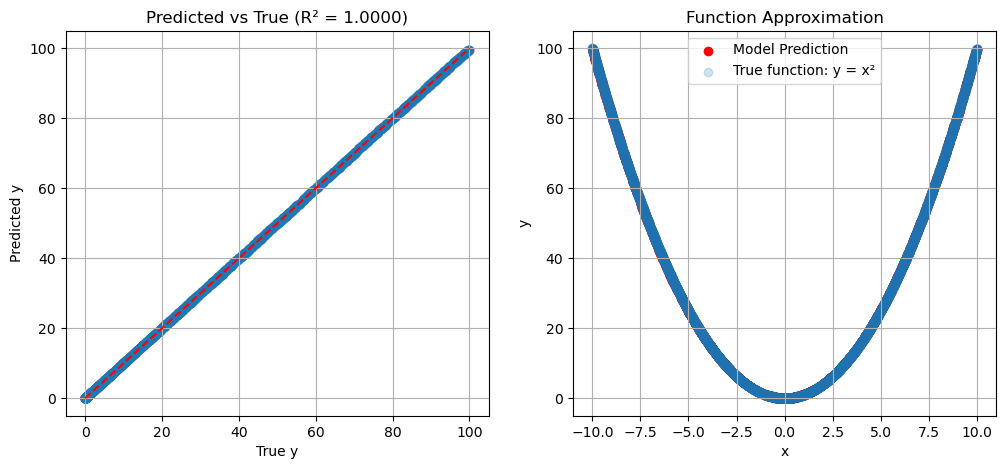

In [5]:
plt.figure(figsize=(12, 5))
# R2 Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred.flatten(), alpha=0.5)  # flatten the predictions
plt.plot([0, 100], [0, 100], 'r--')
plt.title(f"Predicted vs True (R² = {r2:.4f})")
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.grid(True)


plt.subplot(1, 2, 2)
plt.scatter(x_test, y_pred, color='red', label='Model Prediction')
plt.scatter(x, y , alpha=0.2 , label='True function: y = x²')
plt.legend()
plt.title("Function Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [6]:
x1 = np.random.uniform(-10, 10, 10000)
x2 = np.random.uniform(-10, 10, 10000)

y1 = x1 - x2
y2 = x1 + x2

X = np.column_stack((x1, x2))
Y = np.column_stack((y1, y2))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

inputs = Input(shape=(2,))
x = Dense(2, activation='linear')(inputs)  # hidden layer

model = Model(inputs=inputs, outputs=x) 

model.compile(optimizer= 'adam', loss= 'mse')
model.fit(X_train, Y_train, epochs= 100, batch_size=32, validation_split=0.1) 
Y_pred = model.predict(X_test)
r2_y1 = r2_score(Y_test[:, 0], Y_pred[:, 0])
r2_y2 = r2_score(Y_test[:, 1], Y_pred[:, 1])

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 141.0131 - val_loss: 115.7401
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 106.2930 - val_loss: 86.8162
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 81.1169 - val_loss: 63.8776
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 58.0886 - val_loss: 45.9857
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 42.2620 - val_loss: 32.2167
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 29.3616 - val_loss: 21.8825
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 19.9277 - val_loss: 14.3558
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 13.0021 - val_loss: 9.0256
Epoch 9/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 7.8993 - val_loss: 5.4190
Epoch 10/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 4.7699 - val_loss: 3.0949
Epoch 11/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 2.6456 - val_loss: 1.6671
Epo

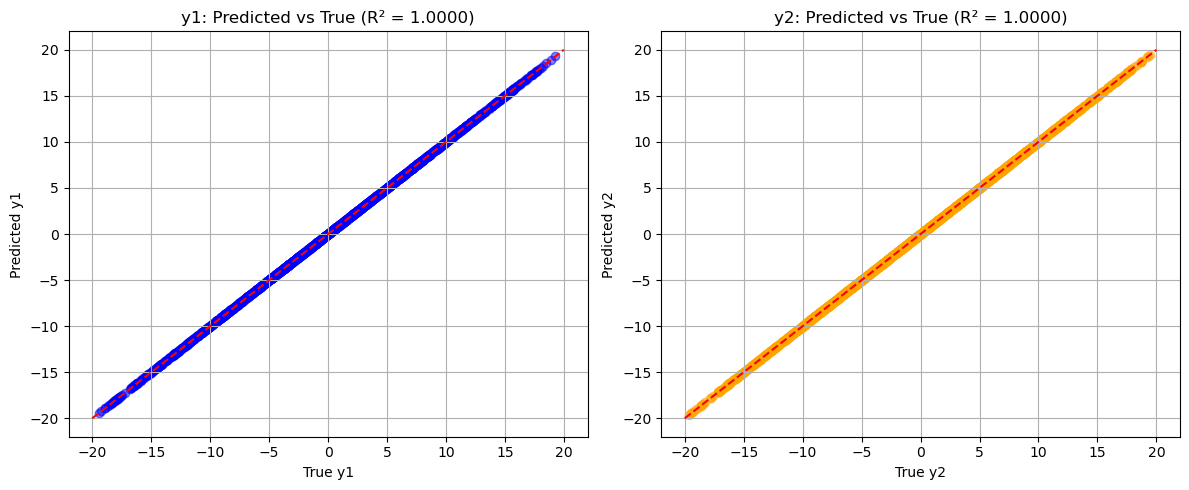

In [7]:
# R2 Scatter Plots (Separate)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(Y_test[:, 0], Y_pred[:, 0], alpha=0.5, color='blue')
plt.plot([-20, 20], [-20, 20], 'r--')
plt.title(f"y1: Predicted vs True (R² = {r2_y1:.4f})")
plt.xlabel("True y1")
plt.ylabel("Predicted y1")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(Y_test[:, 1], Y_pred[:, 1], alpha=0.5, color='orange')
plt.plot([-20, 20], [-20, 20], 'r--')
plt.title(f"y2: Predicted vs True (R² = {r2_y2:.4f})")
plt.xlabel("True y2")
plt.ylabel("Predicted y2")
plt.grid(True)

plt.tight_layout()
plt.show()